# Exploratory data analysis

 <font size="3">Import libraries</font>


In [490]:
# import standard libraries
import numpy as np
# import third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns
# import local libraries

pd.options.display.max_columns = None

<font size="3">Import data</font>

In [456]:
movies = pd.read_csv('movies_metadata_cleaned.csv')
ratings = pd.read_csv('ratings_small.csv')

/Users/williammartin/anaconda3/envs/epfl/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,6,12,30,32,60,62,64,66,68,70,72,74,76,78,80,82,84,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<font size="3">We observe that there are a lot of columns. This is because some movies have long listings of either genres, production companies, production countries, or spoken languages</font>

In [457]:
movies.head()

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

In [458]:
# number of movies at the beginning
print('Our dataset has {} entries'.format(len(movies)))

Our dataset has 45466 entries


## Further cleaning

In [459]:
# make sure 'adult' column only has True or False
unique_adult = list(movies['adult'].unique())
print(unique_adult) # there are some inconsistencies (some long strings and stringified booleans)
unique_adult = [elt for elt in unique_adult if elt != False and elt != True and elt != 'False' and elt != 'True']

[False, 'False', 'True', ' - Written by Ørnås', ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.', True]


In [460]:
# take a look at strange rows in unique_adult
df_unique_adult = movies[movies['adult'].isin(unique_adult)]
df_unique_adult

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We observe that the above rows are pretty weird. We drop them.</font>

In [461]:
movies = movies.drop(index = df_unique_adult.index)

<font size="3">We transform the imdb_id column.</font>

In [462]:
movies['imdb_id'] = movies['imdb_id'].str.strip('tt0') # strip all leading tt and 0s

<font size="3">We continue by converting columns to check for more inconsitencies or errors in the data.</font>

In [463]:
# convert 'adult' column to bool
movies['adult'] = movies['adult'].astype(bool) # runs without errors
# convert all columns representing ids to int
col_id = movies.filter(regex = '_.*id').columns
movies[col_id] = movies[col_id].fillna(value = -1) # workaround since nans cannot be converted to integers
movies[col_id] = movies[col_id].astype(int) # runs without errors
# convert some columns to float'
col_float = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies[col_float] = movies[col_float].astype(float) # runs without errors
# convert 'video' column to bool
movies['video'] = movies['video'].astype(bool) # runs without errors
# convert 'release_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

<font size="3">We then analyse the nans in each columns</font>

In [464]:
nulls = movies.isnull().sum(axis = 0)
display(pd.DataFrame(nulls).T)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

In [465]:
todrop = movies[movies['popularity'].isnull()] # these rows are too incomplete, we drop them
display(todrop)
movies = movies.drop(index = todrop.index)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,genres_id_2,genres_name_2,genres_id_3,genres_name_3,genres_id_4,genres_name_4,genres_id_5,genres_name_5,genres_id_6,genres_name_6,genres_id_7,genres_name_7,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_companies_id_2,production_companies_name_2,production_companies_id_3,production_companies_name_3,production_companies_id_4,production_companies_name_4,production_companies_id_5,production_companies_name_5,production_companies_id_6,production_companies_name_6,production_companies_id_7,production_companies_name_7,production_companies_id_8,production_companies_name_8,production_companies_id_9,production_companies_name_9,production_companies_id_10,production_companies_name_10,production_companies_id_11,production_companies_name_11,production_companies_id_12,production_companies_name_12,production_companies_id_13,production_companies_name_13,production_companies_id_14,production_companies_name_14,production_companies_id_15,production_companies_name_15,production_companies_id_16,production_companies_name_16,production_companies_id_17,production_companies_name_17,production_companies_id_18,production_companies_name_18,production_companies_id_19,production_companies_name_19,production_companies_id_20,production_companies_name_20,production_companies_id_21,production_companies_name_21,production_companies_id_22,production_companies_name_22,production_companies_id_23,production_companies_name_23,production_companies_id_24,production_companies_name_24,production_companies_id_25,production_companies_name_25,production_countries_iso_3166_1_0,production_countries_name_0,production_countries_iso_3166_1_1,production_countries_name_1,production_countries_iso_3166_1_2,production_countries_name_2,production_countries_iso_3166_1_3,production_countries_name_3,production_countries_iso_3166_1_4,production_countries_name_4,production_countries_iso_3166_1_5,production_countries_name_5,production_countries_iso_3166_1_6,production_countries_name_6,production_countries_iso_3166_1_7,production_countries_name_7,production_countries_iso_3166_1_8,production_countries_name_8,production_countries_iso_3166_1_9,production_countries_name_9,production_countries_iso_3166_1_10,production_countries_name_10,production_countries_iso_3166_1_11,production_countries_name_11,production_countries_iso_3166_1_12,production_countries_name_12,production_countries_iso_3166_1_13,production_countries_name_13,production_countries_iso_3166_1_14,production_countries_name_14,production_countries_iso_3166_1_15,production_countries_name_15,production_countries_iso_3166_1_16,production_countries_name_16,production_countries_iso_3166_1_17,production_countries_name_17,production_countries_iso_3166_1_18,production_countries_name_18,production_countries_iso_3166_1_19,production_countries_name_19,production_countries_iso_3166_1_20,production_countries_name_20,production_countries_iso_3166_1_21,production_countries_name_21,production_countries_iso_3166_1_22,production_countries_name_22,production_countries_iso_3166_1_23,production_countries_name_23,production_countries_iso_3166_1_24,production_countries_name_24,spoken_languages_iso_639_1_0,spoken_languages_name_0,spoken_languages_iso_639_1_1,spoken_languages_name_1,spoken_languages_iso_639_1_2,spoken_languages_name_2,spoken_languages_iso_639_1_3,spoken_languages_name_3,spoken_languages_iso_639_1_4,spoken_languages_name_4,spoken_languages_iso_639_1_5,spoken_languages_name_5,spoken_languages_iso_639_1_6,spoken_languages_name_6,spoken_languages_iso_639_1_7,spoken_languages_name_7,spoken_languages_iso_639_1_8,spoken_languages_name_8,spoken_languages_iso_639_1_9,spoken_languages_name_9,spoken_languages_iso_639_1_10,spoken_languages_name_1

<font size="3">We have enough data to drop some rows that have incomplete data in the first columns (adult ~ vote_count)</font>

In [466]:
nulls = nulls[nulls.between(1, 300)].index
for col in nulls:
    todrop = movies[movies[col].isnull()]
    movies = movies.drop(index = todrop.index)
print('Our dataset now has {} entries'.format(len(movies)))

Our dataset now has 45043 entries


<font size="3">We went from 45466 to 45043 entries which is not too bad. We continue inspecting the data.</font>

In [467]:
# let's see how many genres movies have on average
genres_name = movies.filter(regex = 'genres_name_.')
avg_genres = genres_name.count(axis = 1).mean()
print('Number of genres on average over all movies: {}'.format(avg_genres))

Number of genres on average over all movies: 2.0130763936682725


<font size="3">We assume genres are classified from most relevant to least relevant in our dataset. We therefore decide to truncate our dataset so that every movie only has 2 genres.</font>

In [468]:
# truncates genres to 2 possibilities
genres = movies.filter(regex = r'genres.*([2-9]|\d{2,})')
movies = movies.drop(columns = genres.columns)

In [469]:
# let's see how many production companies movies have on average
comp_name = movies.filter(regex = 'production_companies_name_.')
avg_comp = comp_name.count(axis = 1).mean()
print('Number of production companies on average over all movies: {}'.format(avg_comp))
# truncates production companies to 2 possibilities
comp = movies.filter(regex = r'production_companies.*([2-9]|\d{2,})')
movies = movies.drop(columns = comp.columns)

Number of production companies on average over all movies: 1.5617743045534267


In [470]:
# let's see how many production countries movies have on average
coun_name = movies.filter(regex = 'production_countries_name_.')
avg_coun = coun_name.count(axis = 1).mean()
print('Number of production countries on average over all movies: {}'.format(avg_coun))
# truncates production companies to 1 possibility
coun = movies.filter(regex = r'(production_countries_name_([1-9]|\d{2,}))|(production_countries_iso_3166_1_([1-9]|\d{2,}))')
movies = movies.drop(columns = coun.columns)

Number of production countries on average over all movies: 1.0921341828919033


In [471]:
# let's see how many spoken languages movies have on average
lang_name = movies.filter(regex = 'spoken_languages_name.')
avg_lang = lang_name.count(axis = 1).mean()
print('Number of spoken languages on average over all movies: {}'.format(avg_lang))
# truncates production companies to 0 possibilities
# we decide that spoken languages column is useless since we already have original_language column
# also the average number of spoken languages is below 1, which is weird.
lang = movies.filter(regex = r'spoken_languages.*')
movies = movies.drop(columns = lang.columns)

Number of spoken languages on average over all movies: 1.166862775570011


In [472]:
display(movies)
print('We went from over 100 columns to {}'.format(np.shape(movies)[1]))

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,video,vote_average,vote_count,belongs_to_collection_id,belongs_to_collection_name,genres_id_0,genres_name_0,genres_id_1,genres_name_1,production_companies_id_0,production_companies_name_0,production_companies_id_1,production_companies_name_1,production_countries_iso_3166_1_0,production_countries_name_0
0,False,30000000.0,862,114709,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,False,7.7,5415.0,10194,Toy Story Collection,16,Animation,35,Comedy,3,Pixar Animation Studios,-1,NaN,US,United States of America
1,False,65000000.0,8844,113497,en,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,False,6.9,2413.0,-1,NaN,12,Adventure,14,Fantasy,559,TriStar Pictures,2550,Teitler Film,US,United States of America
2,False,0.0,15602,113228,en,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,False,6.5,92.0,119050,Grumpy Old Men Collection,10749,Romance,35,Comedy,6194,Warner Bros.,19464,Lancaster Gate,US,United States of America
3,False,16000000.0,31357,114885,en,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,False,6.1,34.0,-1,NaN,35,Comedy,18,Drama,306,Twentieth Century Fox Film Corporation,-1,NaN,US,United States of America
4,False,0.0,11862,113041,en,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,False,5.7,173.0,96871,Father of the Bride Collection,35,Comedy,-1,NaN,5842,Sandollar Productions,9195,Touchstone Pictures,US,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0.0,30840,102797,en,Robin Hood,5.683753,1991-05-13,0.0,104.0,Released,Robin Hood,False,5.7,26.0,-1,NaN,18,Drama,28,Action,7025,Westdeutscher Rundfunk (WDR),10163,Working Title Films,CA,Canada
45462,False,0.0,111109,202855,tl,Siglo ng Pagluluwal,0.178241,2011-11-17,0.0,360.0,Released,Century of Birthing,False,9.0,3.0,-1,NaN,18,Drama,-1,NaN,19653,Sine Olivia,-1,NaN,PH,Philippines
45463,False,0.0,67758,303758,en,Betrayal,0.903007,2003-08-01,0.0,90.0,Released,Betrayal,False,3.8,6.0,-1,NaN,28,Action,18,Drama,6165,American World Pictures,-1,NaN,US,United States of America
45464,False,0.0,227506,8536,en,Satana likuyushchiy,0.003503,1917-10-21,0.0,87.0,Released,Satan Triumphant,False,0.0,0.0,-1,NaN,-1,NaN,-1,NaN,88753,Yermoliev,-1,NaN,RU,Russia


We went from over 100 columns to 27


<font size="3">We continue inspecting the last columns which have multiple possibilities</font>

In [473]:
# identify movies without a genre
nulls = movies.filter(regex = 'genres_name').isnull().sum(axis = 0)
display(nulls)
print('There are {} movies without a genre. We can drop them.'.format(nulls[0]))
movies = movies[movies['genres_name_0'].notna()]

genres_name_0     2287
genres_name_1    16685
dtype: int64

There are 2287 movies without a genre. We can drop them.


<font size="3">We choose to leave the other columns as they are since not having a production company or not having a production country is irrelevant.</font>

In [499]:
# finally convert boolean columns to integers (False = 0, True = 1)
movies[['adult', 'video']] = movies[['adult', 'video']].astype(int)

## Plotting the data

Text(0, 0.5, 'Number of movies')

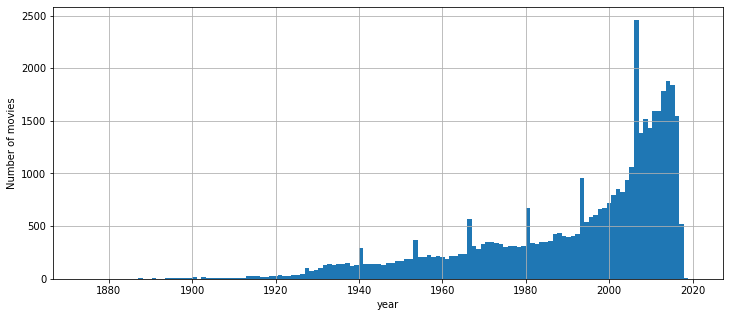

In [495]:
# plot release year
fig, ax = plt.subplots(figsize = (12, 5))
movies['release_year'] = pd.DatetimeIndex(movies['release_date']).year
movies['release_year'].hist(bins = len(movies['release_year'].unique()), ax = ax)
ax.set_xlabel('year')
ax.set_ylabel('Number of movies')

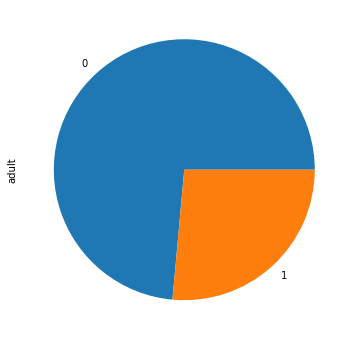

In [503]:
# plot adult category
fig, ax = plt.subplots(figsize = (6, 6))
movies['adult'].value_counts().plot.pie()

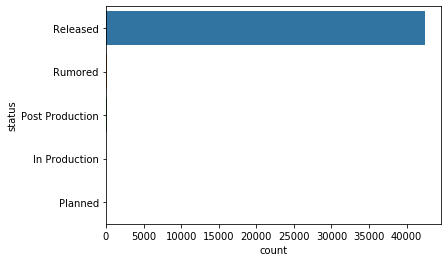

In [507]:
# plot status
sns.countplot(y = 'status', data = movies)